In [5]:
install.packages('ggplot2')

also installing the dependency 'isoband'



package 'isoband' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hyojk\AppData\Local\Temp\RtmpoPYas3\downloaded_packages


In [9]:
library(readxl)
library(dplyr)
library('ggplot2')

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

In [ ]:
total_amt <- order_info_r %>% 
    group_by(reserv_no) %>% 
    

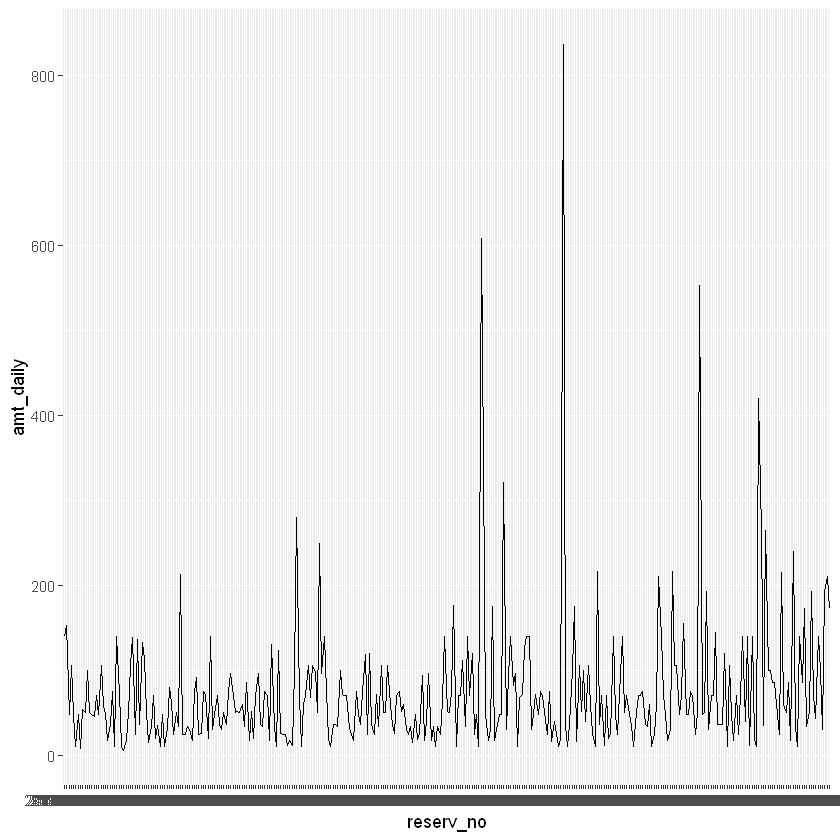

In [8]:
ggplot(data = total_amt, aes(x = reserv_no, y=amt_daily, group=1)) + geom_line()

In [10]:
#월별 매출 선 그래프
# 예약 번호 1~6번째 자리를 선택해서(월단위로 만듬) 그룹화
total_amt <- order_info_r %>% 
    mutate(month = substr(reserv_no, 1, 6)) %>%    #mutate : 열을 하나 새로 생성한다. 여기서는 month라는 열을 새로 생성
                                                    #substr : 열을 특정 범위에서 자른다
    group_by(month) %>% 
    summarise(amt_monthly=sum(sales/1000))
total_amt

month,amt_monthly
201906,613
201907,1744
201908,1622
201909,1586
201910,3333
201911,5197
201912,10862


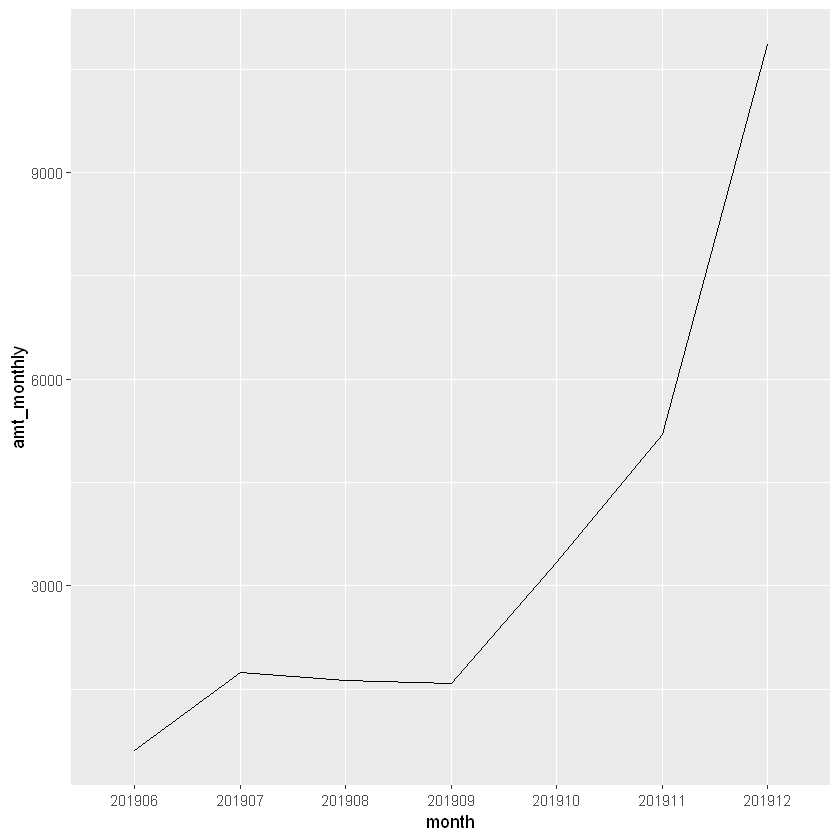

In [13]:
ggplot(total_amt, aes(x=month, y=amt_monthly, group=1)) + geom_line()  #선을 그릴때는 group=1을 항상 넣는다

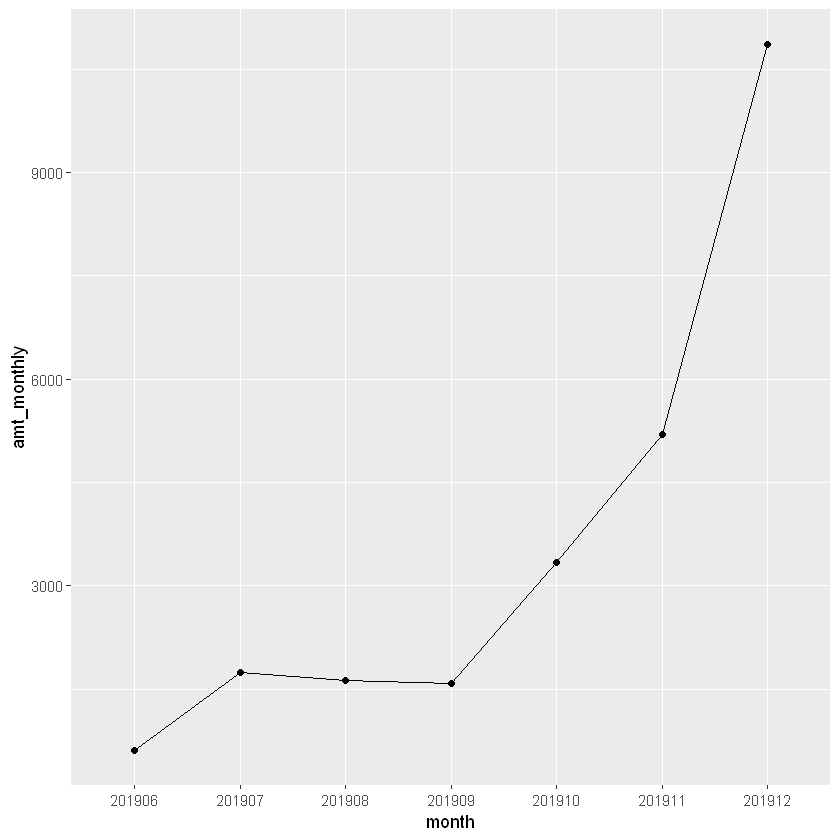

In [16]:
# 선 그래프의 각 월 매출에 점 그리기
ggplot(total_amt, aes(x=month, y=amt_monthly, group=1)) + geom_line() + geom_point()

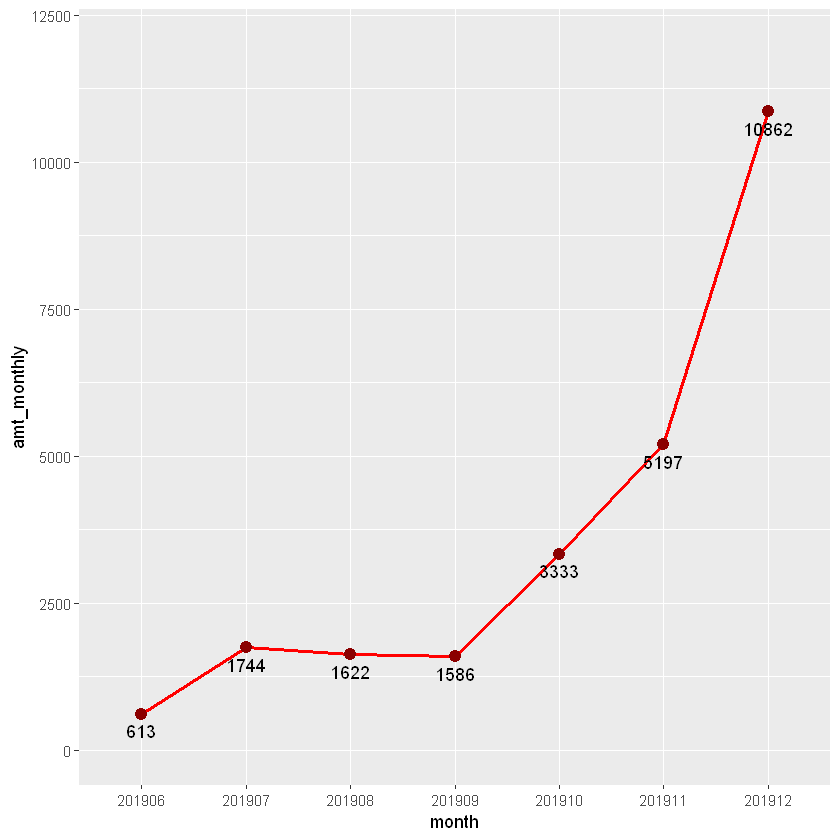

In [24]:
ggplot(total_amt, aes(x=month, y=amt_monthly, group=1, label=amt_monthly)) + 
    geom_line(color="red", size=1) + geom_point(color="darkred", size=3) + 
    geom_text(vjust=1.7, hjust=0.5) +  #vjust : 수직 위치, hjust : 수평 위치
    ylim(0,12000)

In [62]:
#상자 그림 : 데이터 분포 확인
df_boxplot_graph <- inner_join(order_info_r, item_r, by="item_id")
head(df_boxplot_graph)

order_no,item_id,reserv_no,quantity,sales,product_name,product_desc,category_id,price
191228137840110010,M0003,2019122805,1,17000,PIZZA,피자,FOOD,17000
191228137837810010,M0001,2019122806,10,240000,SPECIAL_SET,온라인_전용상품,COMBO,24000
191228547385810010,M0003,2019122807,2,34000,PIZZA,피자,FOOD,17000
191228567831310010,M0008,2019122808,1,10000,SANDWICH,샌드위치,FOOD,10000
191228567430310010,M0005,2019122809,4,140000,STEAK,스테이크,FOOD,35000
191228137860010010,M0005,2019122810,2,70000,STEAK,스테이크,FOOD,35000


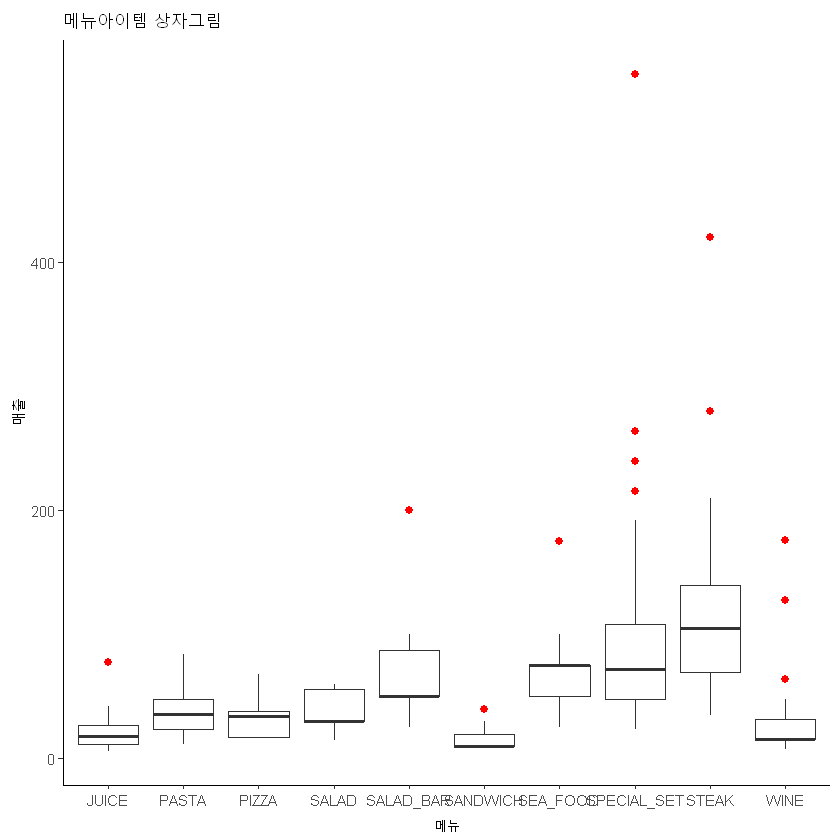

In [67]:
#아이템별 매출 분포를 나타내는 그림
ggplot(df_boxplot_graph, aes(product_name, sales/1000)) +
    geom_boxplot(width=0.8, outlier.size=2, outlier.colour="red") +
    labs(title="메뉴아이템 상자그림",x="메뉴",y="매출") +
    theme_classic()

In [32]:
head(ToothGrowth)
tail(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


,len,supp,dose
55,24.8,OJ,2
56,30.9,OJ,2
57,26.4,OJ,2
58,27.3,OJ,2
59,29.4,OJ,2
60,23.0,OJ,2


In [37]:
#VC와 OJ 2개의 그래프 그려보기
a <- ToothGrowth %>% group_by(supp='VC') %>% arrange(len)
b <- ToothGrowth %>% group_by(supp='OJ') %>% arrange(len)
head(a)
head(b)

len,supp,dose
4.2,VC,0.5
5.2,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
7.0,VC,0.5
7.3,VC,0.5


len,supp,dose
4.2,OJ,0.5
5.2,OJ,0.5
5.8,OJ,0.5
6.4,OJ,0.5
7.0,OJ,0.5
7.3,OJ,0.5


In [38]:
df <- ToothGrowth %>% 
    group_by(dose) %>%    # 투여량 별로 그룹화
    summarise(sd=sd(len), len=mean(len))    #sd : 표준편차, mean: 평균
df

dose,sd,len
0.5,4.499763,10.605
1.0,4.415436,19.735
2.0,3.774150,26.100


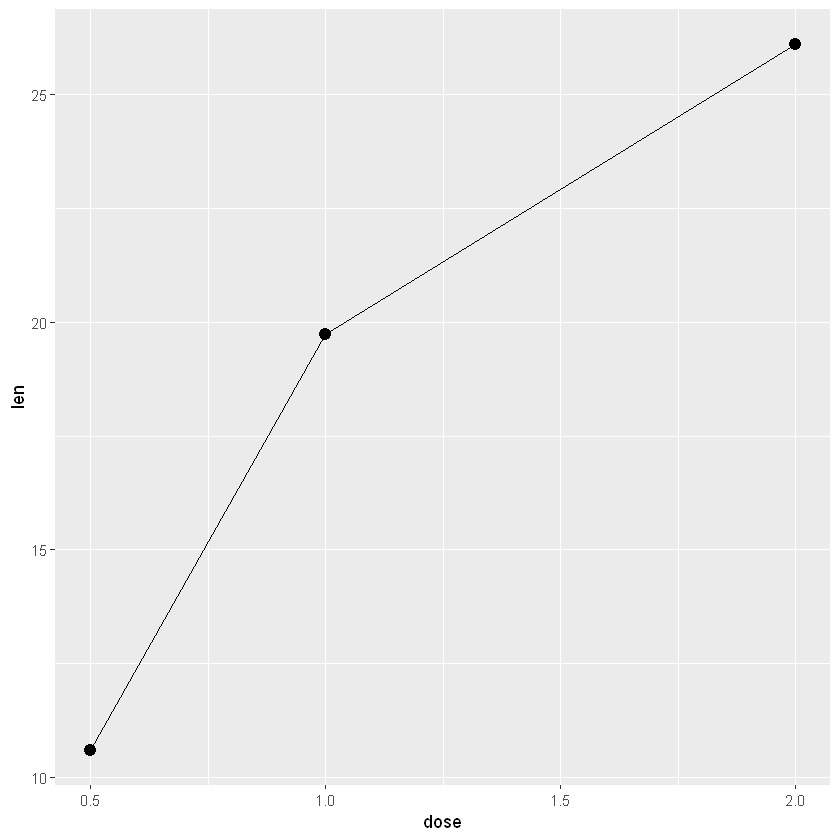

In [70]:
ggplot(df, aes(dose,len)) + 
    geom_line(aes(group=1)) + geom_point(size=3)
# geom_line 그래프를 그릴 때는 반드시 group을 지정해야 한다

In [45]:
df2 <- ToothGrowth %>% 
    group_by(dose, supp) %>% 
    summarise(sd=sd(len), len=mean(len))
df2

`summarise()` has grouped output by 'dose'. You can override using the `.groups` argument.


dose,supp,sd,len
0.5,OJ,4.459709,13.23
0.5,VC,2.746634,7.98
1.0,OJ,3.910953,22.70
1.0,VC,2.515309,16.77
2.0,OJ,2.655058,26.06
2.0,VC,4.797731,26.14


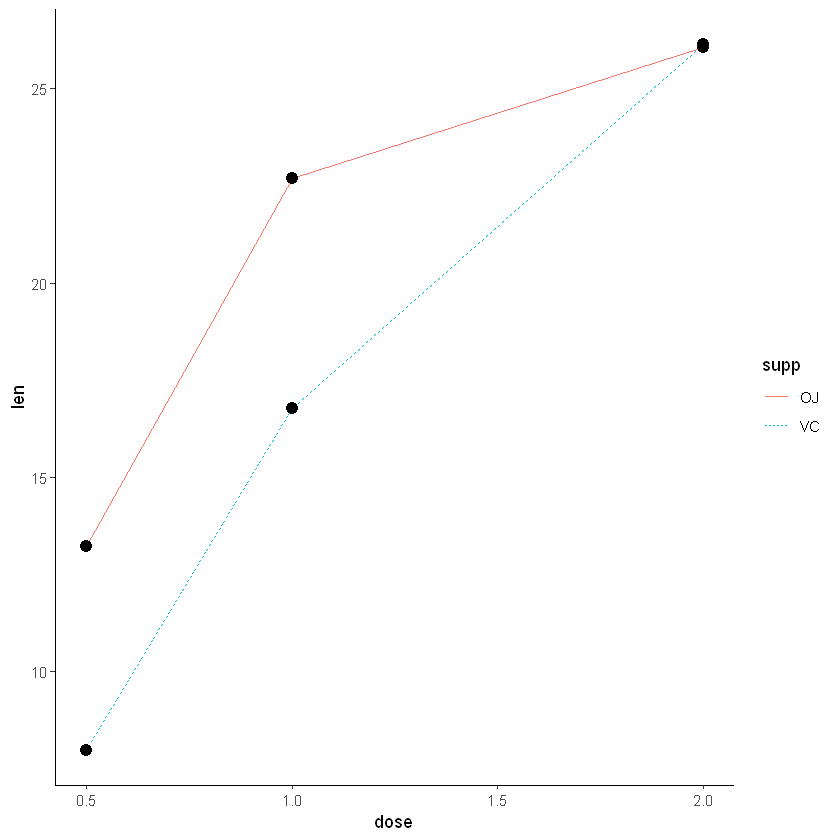

In [89]:
ggplot(df2, aes(dose, len)) + 
    geom_line(aes(group=supp, linetype=supp, color=supp)) +
    geom_point(size=3) +
    theme_classic()

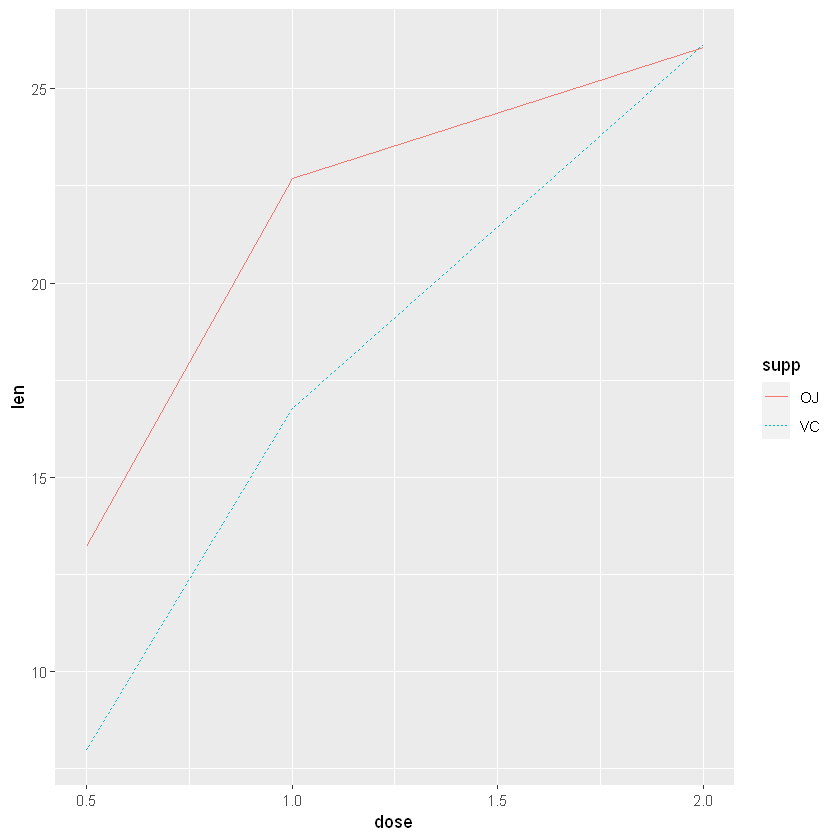

In [90]:
ggplot(df2, aes(dose, len)) + 
    geom_line(aes(group=supp, linetype=supp, color=supp))